# Usage of Hurst Exponent

## Problem Statement

This project aims to:

+ Analyse the effectiveness of Hurst Exponent Analysis for trading.

+ Develop modelling techniques to minimize effect of white noise.

In financial markets, two of the most common trading strategies used by investors are the momentum and mean reversion strategies and the Hurst Exponent $H$ can help us determine whether a time series is a random walk $(H \sim 0.5)$, trending $(H \gt 0.5)$ or mean reverting $(H \lt 0.5)$ for a specific period of time. 

The Hurst Exponent of the underlying stock price process will then be combined with other indicators of momentum and/or mean reversion to inform or trading decisions.

## Literature Review

### Introduction

When studying price movements of a financial instrument, modelling them using an accurate stochastic process goes a long way into being able to predict future prices movements and make necessary decisions about what actions to take. 

In most of the cases, stock prices follow a random walk process and can be modeled using a stochastic differential equation of the form [1]:

$$ \large dX(u) = \beta (u, X(u))du + \gamma (u, X(u))dW(u) $$

where $\beta (u, x)$ and $\gamma (u,x)$ are functions called the _drift_ and _diffusion_ of the stock price and $W(u)$ is Brownian motion. Using this basic model, we can define many variations of the stock price model such as Geometric Brownian Motion and Black-Scholes-Merton model for options, the Vasicek, Hull-White and Cox-Ingersoll-Ross models for interest rates, and others such as the Heston and SABR (Stochastic alphs, beta, rho) models for dynamic volatility. They all have an underlying Brownian motion process giving them a random walk behaviour.

On the other hand, the Hurst exponent provides a way to measure the amount by which a financial time series deviates from a pure random walk. It measures the extent to which the underlying process shows a long term trending behaviour or has strongly anti-persistent bahaviour. This type of underlying process helps us model stock price movements more realistically in cases where the equity tends to deviate from the random walk process.

### Body

The thesis paper by Ton Dieker [2] shows how we can use fractional Brownian motion (fBM) to model stochastic process that deviate from a random walk. In Section 1.2 he defines mathematically the concept of fraction Brownian motion and the corresponding incremental process of fractional Gaussian noise.

Following the pioneering work by Mandelbrot and van Ness [3], fractional Brownian motion is defined by its stochastic representation:

$$ \large B_H(t) := \frac{1}{\Gamma \left(H + \frac{1}{2}\right)} \left( \int_{-\infty}^{0} [(t-s)^{H-1/2}-(-s)^{H-1/2}]dB(s) + \int_{0}^{t}(t-s)^{H-1/2}dB(s)\right) $$


where $\Gamma$ represents the Gamma function $\Gamma(\alpha) := \int_{0}^{\infty}x^{\alpha - 1} exp(-x)dx$ and $0 \lt H \lt 1$ is called the Hurst parameter. The integrator $B$ is a stochastic process, ordinary Brownian motion. Note that $B$ is recovered by taking $H = 1/2$. We assume that $B$ is defined on some probability space $(\Omega, \mathcal{F}, P)$.

By this definition of a normalized fractional Brownian motion $B_H = \{B_H(t) : 0 \le t \lt \infty\}$ with $0 \lt H \lt 1$ is uniquely characterized by the following properties [4]:

+ $B_H(t)$ has stationary increments;

+ $B_H(0) = 0$, and $\mathbb{E}[B_H(t)] = 0$ for $t \ge 0$;
  
+ $\mathbb{E}[B_H^2(t)] = t^{2H}$ for $t \ge 0$;
  
+ $B_H(t)$ has a Gaussian distribution for $t \gt 0$.
  
Dieker continues the evaluation of several simulation methods for fractional Brownian motion in his thesis and in Chapter 2 describes some algorithms to simulate fractional Brownian motion (or fractional Gaussian noise). The first part addresses the available exact methods (i.e., the output of the method is a sampled realization of fractional Brownian motion). Several approximate methods are presented in the second part. A number of methods based on the Fast Fourier Transformation (FFT) are also included.

Exact methods studied:

+ The Hosking method [5]

+ The Cholesky method [6]

+ The Davies and Harte method [7]

Approximate methods studied:

+ Stochastic representation method [3]

+ Aggregating packet processes [8]

+ Random Midpoint Displacement [9]

+ Spectral simulation, the Paxson method and the approximate circulant method [10,11]

+ Wavelet-based simulation [12]

In Chapter 3 Dieker discusses some popular methods to estimate the long-range dependence parameter $H$. Although most of the estimation techniques are standard tools in the analysis of long-range dependent processes, a number of recent estimation methods, based on discrete variations and wavelets, are also reviewed. In addition, a test is proposed that is perfectly suitable for our evaluation purposes.

Estimation methods studied:

+ Aggregated variance method [13]

+ Absolute moments method [14]

+ Discrete variations [15]

+ The Higuchi method [16]

+ Periodogram method [17]

+ Variance of the regression residuals [18]

+ Rescaled Range (R/S) analysis [19]

+ Whittle's method [20]

+ Wavelet method [21]

The theory behind these derivations use the stochastic calculus of variations, known as Malliavin calculus, outlined in the lecture notes by Eulalia Nualart [22].

### Conclusion

The Hurst exponent is a parameter used to charcterize a generic fractional Brownian motion process that can be used to model stock prices that are not always based on a random walk. The random walk process is obtained when $H = 1/2$, while processes with $H \gt 1/2$ show long-range dependence or persistent behaviour and $H \lt 1/2$ show anti-persistent bahaviour. Properly identifying such anomalies can in principle be extremely useful for building efficient trading strategies.

The literature review goes through multiple methods for estimating the Hurst exponent from observed timeseries data and multiple methods for simulating fBm processes with a given Hurst exponent. These are important tools that can be used to enhance any existing indicators and data analysis done when trying to predict actions to be taken in a trading scenario. With that information, we can decide which of the two alternate strategies, mean reversion or momentum, is more appropriate to adopt, for a particular timeseries and for a particular time horizon.


### Competitor Analysis

Based on the thesis by Dieker, it is possible to implement some of the simulation and estimation routines in Python, but we found the following Python package by Flynn [23] and Mottl [24] that implements a number of the routines. 

The `fbm` package by Flynn generates Fractional Brownian motion via either Hosking’s method, the Cholesky method, or the Davies-Harte method. All three methods are theoretically exact in generating a discretely sampled fBm/fGn.

The `hurst` package by Mottl is a Python module for analysing random walks and evaluating the Hurst exponent $(H)$ using the Rescaled Range (R/S) analysis originally proposed by Hurst.

In this project we intend to use `hurst` package to analyze time series of stock prices to determine the Hurst parameter of some stock price timeseries to determine if it shows some deviation from the random walk hypothesis. This can then be used directly to make decisions on how to trade the stock directly, or can be combined with Monte Carlo simulations using the `fbm` package to predict future option prices of the underlying stock.

The Hurst exponent will be one of many other indicators used in the decision making process in any algorithm for trading and needs to be backtested to show how effective it would be to use.


## Project Design

### Approach

The overall approach is to take existing trading strategies that utilize momentum and mean reversion and see how they perform with the additional knowledge gained by looking at the Hurst exponent of the stock price series.

For momentum trading strategies we will consider:

+ Simple moving average cross-over.

+ Multiple moving average ribbons.

For mean-reversion strategies we will consider:

+ Single stock mean reversion.

+ Pairs trading.

Given time, we will also look at calculating options prices using Monte Carlo simulation of the underlying stock prices for different $H$ values and see how they differ from the standard Black-Scholes-Merton pricing model.

### Methodology

For each strategy, we are going to:

+ Define the problem.

+ Collect the data.

+ Create the features.

+ Split the data into training and test data sets.

+ Backtest.

+ Optimize the strategy to use.


For the purpose of this project we will be using the Auquan Toolbox [25] for backtesting. This toolbox provides open source Python libraries to quickly:

+ Get Historical Data.

+ Specify Features to be created from the Data.

+ Create a prediction using above features to make a prediction for the market.

+ Execute the strategy using a Trading system for backtesting.

Finally the results of each backtesting execution will return the following final metrics:

1. _Total PnL:_ Total Profit(or Loss) from your strategy as a % of initial capital.

2. _Annualized Return:_ The yearly average % Profit(or Loss) from your trading strategy.

3. _Annualized Volatility:_ The standard deviation of daily returns of the model in a year. Volatility is used as a measure of risk, therefore higher vol implies riskier model.

4. _Sharpe Ratio:_ The reward/risk ratio or risk adjusted returns of the strategy, calculated as Annualized Return/Annualized Volatility.

5. _Sortino Ratio:_ Returns adjusted for downside risk, calculated as Annualized Return/Annualized Volatility of Negative Returns.

6. _Max Drawdown:_ Largest drop in Pnl or maximum negative difference in total portfolio value. It is calculated as the maximum high to subsequent low difference before a new high is reached.

7. _Win/Loss, Average Profit/Loss:_ Sum(or Average) of Profits from trades that results in profits/Sum(or Average) of losses from trades that results in losses

8. _% Profitability:_ % of total trades that resulted in profits

9. _Return on Capital:_ Total Profit(or Loss) from your strategy as a % of max capital used

We will use these metrics to help optimize the strategies to select the best hyper-parameters such as the entry level, stop loss level, profit taking level, moving average time frames, etc.

The best strategies will then be run against a test data set to determine how it behaves on unseen data and help us determine if we had any over-fitting of the training data.

### Desired Outcomes

In momentum and mean-reversion trading strategies, we want to make trading decisons when the stock price we are tracking is showing strong momentum $(H \gt 1/2)$ and mean-reversion $(H \lt 1/2)$ tendencies as measured by the Hurst exponent. In addition to the standard momemtum or mean-reversion indicators such as moving averages and standard deviations we will also calculate the Hurst exponent to inform our trading strategy as to whether the stock price will continue to show momentum or mean-reversion tendencies.

We are hoping that this additional indicator will provide more profitable trades than the standard indicators can and will be measured in terms of Total PnL over a test set over a fixed period of time.

### Working Plan

+ First carry out some exploratory data analysis to find individual stocks that show trending or mean-reverting price behaviour that will be useful for the development of different strategies. Also in this stage we will spend some time selecting stock pairs that would be suitable pairs trading that show highly cointegrated time series.

+ Define a range of time periods over which we want to analyze the data, different sets of entry levels, stop-loss levels and profit-taking levels, and different levels of $H$ that we want to backtest the strategies on. These will be the hyper-parameters that we will tune for each strategy mindful of not overfitting the training data.

+ Evaluate the best strategies on the held out test data to test our hypothesis that the use of the Hurst exponent would lead to more profitable trading strategy and report on the findings.

+ Given time, explore other areas in which the Hurst exponent could be used, such as in Option pricing using simulated stock price paths based on fractional Brownian motion.

## Project Development

All development code can be found in the following Github repository:

https://github.com/diyanr/FE690_Capstone

### Simulate fractional Brownian Motion

Develop routines to simulate a fBM using the Davies and Harte method, see section 2.1.3 in [2] using the algorithm presented on page 17. 

Plotting four sample paths, each having different values of the Hurst parameter:  𝐻∈{0.2,0.5,0.6,0.9} . Consider  𝑇=1  with  𝑛=2000  time steps.


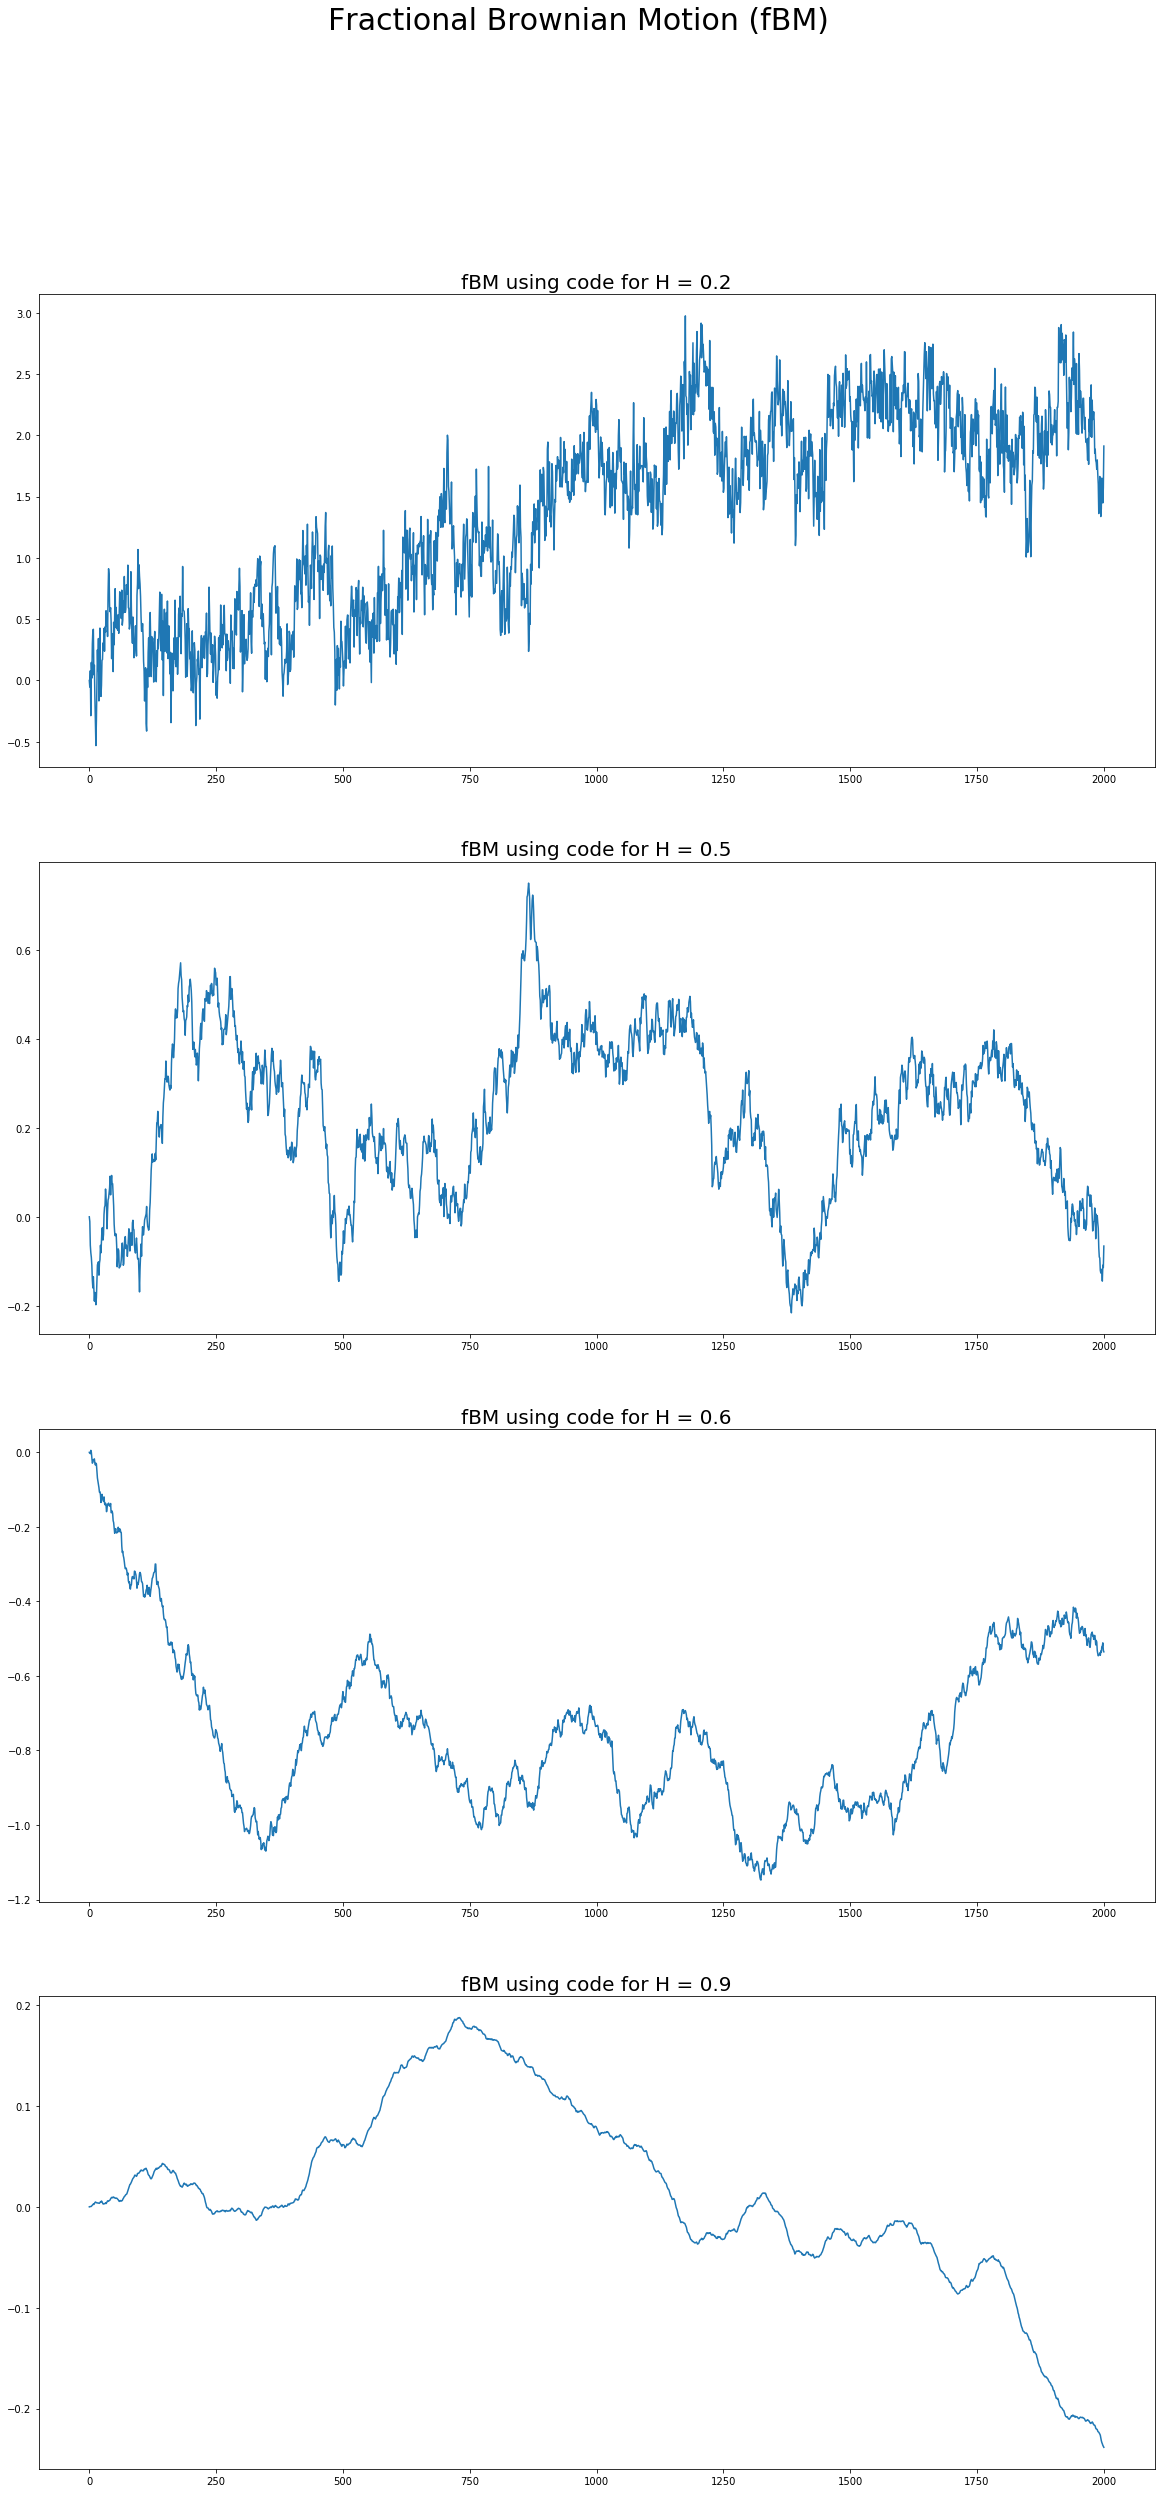

In [1]:
import fractional as f
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 40))
fig.suptitle('Fractional Brownian Motion (fBM)', fontsize=30)

ax1 = plt.subplot2grid((4, 1), (0, 0))
ax1.plot(f.fbmDH(n=2000, H=0.2, T=1), color='#1f77b4')
ax1.set_title('fBM using code for H = 0.2', fontsize=20)

ax2 = plt.subplot2grid((4, 1), (1, 0))
ax2.plot(f.fbmDH(n=2000, H=0.5, T=1), color='#1f77b4')
ax2.set_title('fBM using code for H = 0.5', fontsize=20)

ax3 = plt.subplot2grid((4, 1), (2, 0))
ax3.plot(f.fbmDH(n=2000, H=0.6, T=1), color='#1f77b4')
ax3.set_title('fBM using code for H = 0.6', fontsize=20)

ax4 = plt.subplot2grid((4, 1), (3, 0))
ax4.plot(f.fbmDH(n=2000, H=0.9, T=1), color='#1f77b4')
ax4.set_title('fBM using code for H = 0.9', fontsize=20)

plt.show()

### Calculate Options using fBM

The observed dependence structure of log returns can be modeled using an fBm process. Specifically, consider a regular geometric Brownian motion model, with $W_t$ replaced by an fBm $Z_t$, having $\mathbb{E}[Z_t^2] = t^{2H}$:

$$\large dS_t = S_t(rdt + \sigma dZ_t), S(0) = S_0$$

When $H = \frac{1}{2}$ the fBm becomes a standard Brownian motion. Thus, this model is an extension of the Black-Scholes-Merton model. 

Pricing a European call option under this model, with $S_0 = K = 100, T = 1, r = 5\%$, and $\sigma = 20\%$ using a Monte Carlo simulation with an Euler discretization. 

Consider at least 1 million paths and four different values of the Hurst parameter, i.e. $H \in \{0.2, 0.5, 0.6, 0.9\}$. 

Compared with the result obtained using the classical Black-Scholes model.


In [2]:
import pandas as pd
import hurstoptions as ho

S0 = 100.0
K = 100.0
r = 0.05
delta = 0.0
T = 1.0
sigma = 0.2

# Calculate the analytical BS call option price
BS = ho.BSDivCallValue(sigma, S0, K, r, delta, T)

# Calculate Monte Carlo call option price using different values of N and M
MC_H02 = ho.EuropeanOptionPriceHurst(sigma, S0, K, r, delta, T, H=0.2, N=300, M=1000000)
MC_H05 = ho.EuropeanOptionPriceHurst(sigma, S0, K, r, delta, T, H=0.5, N=300, M=1000000)
MC_H06 = ho.EuropeanOptionPriceHurst(sigma, S0, K, r, delta, T, H=0.6, N=300, M=1000000)
MC_H09 = ho.EuropeanOptionPriceHurst(sigma, S0, K, r, delta, T, H=0.9, N=300, M=1000000)

# Store results in a dataframe
MC_results = pd.DataFrame({"Analytic Price": [BS, BS, BS, BS],
                            "N": [300, 300, 300, 300],
                            "M": [1000000, 1000000, 1000000, 1000000],
                            "H": [0.2, 0.5, 0.6, 0.9],
                            "Monte Carlo Price": [MC_H02, MC_H05, MC_H06, MC_H09]})
print(MC_results)

   Analytic Price    N        M    H  Monte Carlo Price
0       10.450584  300  1000000  0.2         108.468455
1       10.450584  300  1000000  0.5          10.435205
2       10.450584  300  1000000  0.6           6.367186
3       10.450584  300  1000000  0.9           2.979228


### Backtest Momentum Strategies

Using the Auquan Toolbox as a backtester, we will backtest the momentum strategy for a number of different scenarios.

#### Single Stock without Hurst Indicator

In this case we are going to apply a momentum strategy to a single stock using built in momentum features to generate the trading signals. The backtesting is run for 2 individual stocks - AAPL and GOOG - over a period of 10 years - 2009/12/31 to 2019/12/31 - with daily updates to the features being measured - 10-day and 30-day momentum.

In [3]:
%%capture
import json
import momentum_plain as mp

plain_mom_res = mp.run_plain_momentum()

In [4]:
print(json.dumps(plain_mom_res, indent=2))

{
  "instrument_names": [
    "AAPL",
    "GOOG"
  ],
  "instrument_stats": [
    {
      "pnl": {
        "AAPL": 0.028423803999999966
      },
      "score": {
        "AAPL": -0.790748971242141
      }
    },
    {
      "pnl": {
        "GOOG": -0.22986618599999992
      },
      "score": {
        "GOOG": -1.4628432399574984
      }
    }
  ],
  "pnl": -0.20144238199999995,
  "trading_days": 2608,
  "annual_return": -0.021501268083063296,
  "annual_vol": 0.070429950777103,
  "sharpe_ratio": -0.3052858598625264,
  "score": -1.1267961055998197,
  "variance": 78.73615819785954,
  "portfolio_value": 1597.115236,
  "total_profit": 5873.237319000003,
  "maxDrawdown": 806.7949800000001,
  "maxPortfolioValue": 2081.0105410000006,
  "count_loss": 1137,
  "count_profit": 1077,
  "capital": 1724.953516700008,
  "capitalUsage": 2162.426382149994,
  "total_loss": 6276.122082999997
}


#### Single Stock with Hurst Indicator

In this case we are going to apply the same momentum strategy as before to a single stock using built-in momentum features and a custom Hurst index feature to generate the trading signals. The same two individual stocks are used over the same 10 year period and the same 10-day and 30-day momentum features. A custom Hurst index feature was built to calculate the 120-day Hurst index for the adjusted closing price of each stock before making a decision. Since this is a momentum strategy, we decide to enter a short/long position only if $H > 0.5$ so that we can expect the momentum to be maintained.

In [5]:
%%capture
import momentum_hurst as mh

hurst_mom_res = mh.run_hurst_momentum()

In [6]:
print(json.dumps(hurst_mom_res, indent=2))

{
  "instrument_names": [
    "AAPL",
    "GOOG"
  ],
  "instrument_stats": [
    {
      "pnl": {
        "AAPL": 0.006637591999999941
      },
      "score": {
        "AAPL": -0.9496213848128479
      }
    },
    {
      "pnl": {
        "GOOG": -0.31044456449999985
      },
      "score": {
        "GOOG": -1.6043848374693253
      }
    }
  ],
  "pnl": -0.30380697249999994,
  "trading_days": 2608,
  "annual_return": -0.03438582228552434,
  "annual_vol": 0.06126560661675521,
  "sharpe_ratio": -0.5612581705201029,
  "score": -1.2770031111410867,
  "variance": 59.578961176492044,
  "portfolio_value": 1392.3860550000002,
  "total_profit": 4664.675326999999,
  "maxDrawdown": 789.781434,
  "maxPortfolioValue": 2111.0221470000006,
  "count_loss": 1042,
  "count_profit": 947,
  "capital": 2000.0000000000073,
  "capitalUsage": 2162.426382149995,
  "total_loss": 5272.289271999996
}


#### Stock Pairs without Hurst Indicator

In this case we are going to apply a pairs trading strategy to a pair of stocks selected to have closely co-integrated price series. We selected two pairs of stocks - AAPL/GOOG and ADBE/MSFT - over the same 10 year perid - 2009/12/31 to 2019/12/31 - with daily updates to the features being measured.

We used 5 built-in market features for each pair - ratio of the adjusted closing prices of each pair of stocks, the 10-day and 90-day moving average of the ratio, the 90-day standard deviation of the ratio and the 90-day cross-instrument correlation between the adjusted closing prices of each pair of stocks. Based on these we also built a custom z-score feature which takes the difference between the 2 moving avearge features divided by the standard deviation. Positions are taken if the z-score exceeds 1 or goes below -1 as long as cross-instrument correlation shows they are strongly co-integrated. This strategy depends on a mean-reversion property of the ratio of the stock prices of each pair of stocks.

In [7]:
%%capture
import pairs_plain as pp

plain_pair_res = pp.run_plain_pairs()

In [8]:
print(json.dumps(plain_pair_res, indent=2))

{
  "instrument_names": [
    "AAPL",
    "ADBE",
    "GOOG",
    "MSFT"
  ],
  "instrument_stats": [
    {
      "pnl": {
        "AAPL": -3.7353172995e-05
      }
    },
    {
      "pnl": {
        "ADBE": -5.629640285499994e-05
      }
    },
    {
      "pnl": {
        "GOOG": -0.00031890892348499986
      }
    },
    {
      "pnl": {
        "MSFT": -3.138790100999997e-05
      }
    }
  ],
  "pnl": -0.0004439464003449998,
  "trading_days": 2608,
  "annual_return": -4.2905265654091806e-05,
  "annual_vol": 1.7403801550010697e-05,
  "sharpe_ratio": -2.465281250811863,
  "portfolio_value": 9995560.53599655,
  "total_profit": 3351.233071350008,
  "zscore_r1": 1.5152621800261232,
  "correl_r2_90": 0.9252008701535739,
  "ratio1": 0.21668583438091255,
  "ma_r1_90": 0.19156532520113728,
  "ma_r1_10": 0.20922239035339157,
  "zscore_r2": 1.4185144415680409,
  "capital": 9993598.191393541,
  "ma_r2_10": 2.1070722801385338,
  "sdev_r1_90": 0.01165281189288964,
  "sdev_r2_90": 0.05263146472

#### Stock Pairs with Hurst Indicator

In this case we are going to apply the same mean reversion strategy as before for stock pairs using the previously defined features and a custom Hurst index feature to generate the trading signals. The same two pairs of stocks are used over the same 10 year period and the same features. A custom Hurst index feature was built to calculate the 120-day Hurst index for the price ratio of each pair of stocks before making a decision. Since this is a mean reversion strategy, we decide to enter a pairs position only if $H < 0.5$ so that we can expect the price reversion to take place.

In [9]:
%%capture
import pairs_hurst as ph

hurst_pair_res = ph.run_hurst_pairs()

In [10]:
print(json.dumps(hurst_pair_res, indent=2))

{
  "instrument_names": [
    "AAPL",
    "ADBE",
    "GOOG",
    "MSFT"
  ],
  "instrument_stats": [
    {
      "pnl": {
        "AAPL": -4.0087536040000023e-05
      }
    },
    {
      "pnl": {
        "ADBE": -4.180050268999998e-05
      }
    },
    {
      "pnl": {
        "GOOG": -0.00020563721254999995
      }
    },
    {
      "pnl": {
        "MSFT": -2.3964048294999987e-05
      }
    }
  ],
  "pnl": -0.0003114892995749999,
  "trading_days": 2608,
  "annual_return": -3.0102127924869215e-05,
  "annual_vol": 1.2642837824256916e-05,
  "sharpe_ratio": -2.380962909064166,
  "portfolio_value": 9996885.10700425,
  "variance": 63.42910644859576,
  "correl_r1_90": 0.9611230585179067,
  "total_profit": 410.79657599999837,
  "count_loss": 224,
  "count_profit": 112,
  "ma_r2_90": 2.032413787347841,
  "capitalUsage": 4794.211066737771,
  "zscore_r1": 1.5152621800261232,
  "sdev_r1_90": 0.01165281189288964,
  "correl_r2_90": 0.9252008701535739,
  "ratio1": 0.21668583438091255,
  "rati

## Project Implementation

The following sections describe some of the details behind the implementation of the algorithms.


### Fractional Brownian Motion

In this project we implemented the algorithm as described in the Davies and Harte method, section 2.1.3 in [2]. This is done in three successive steps:

1. Compute the eigenvalues, which constitute the matrix $\Lambda$, of the circulant matrix $C=Q\Lambda Q^*$ given by the equation:

$$\large \lambda_k = \sum^{2N - 1}_{j = 0} r_j \exp \left( 2 \pi i \frac{jk}{2N} \right), \; \textrm{for} \; k = 0, ... , 2N - 1$$

$\;\;\;\;$ This is done with the Fast Fourier Transform (FFT).


```python
def computeE(N, H):
    """
    Compute the eigenvalues
    """
    # Create the circular matrix row
    forward = [covariance(i, H) for i in range(1, N)]
    reverse = list(reversed(forward))
    row = [covariance(0, H)] + forward + [0] + reverse

    # return the eigenvalues
    return fft(row).real
```

2. Calculate $W = Q^* V$. A derivation of the covariance structure of $W$ leads to the following simulation scheme:

+ Generate two standard normal random variables $W_0$ and $W_N$;

+ For $1 \le j \lt N$, generate two independent standard normal random variables $V_j^{(1)}$ and $V_j^{(2)}$ and let

$$\large W_j  = \frac{1}{\sqrt{2}}\left( V_j^{(1)} + iV_j^{(2)} \right)$$

$$\large W_{2N - j}  = \frac{1}{\sqrt{2}}\left( V_j^{(1)} - iV_j^{(2)} \right)$$

The resulting vector $W$ has the same distribution as $Q^*V$.

```python
def computeW(eigenvals, N):
    """
    Compute W=Q*V
    """
    # generate two standard normal random numbers of size N
    rg = Generator(PCG64())
    V1 = rg.standard_normal(size=N)
    V2 = rg.standard_normal(size=N)

    # create a vector of complex weight W
    W = np.zeros(2 * N, dtype=complex)
    for i in range(2 * N):
        if i == 0:
            W[i] = np.sqrt(eigenvals[i] / (2 * N)) * V1[i]
        elif i < N:
            W[i] = np.sqrt(eigenvals[i] / (4 * N)) * (V1[i] + 1j * V2[i])
        elif i == N:
            W[i] = np.sqrt(eigenvals[i] / (2 * N)) * V2[0]
        else:
            W[i] = np.sqrt(eigenvals[i] / (4 * N)) * (V1[2 * N - i] - 1j * V2[2 * N - i])

    return W
```

3. Compute $Z = Q\Lambda^{1/2}W$:

$$\large Z_k = \frac{1}{\sqrt{2N}} \sum_{j=0}^{2N-1} \sqrt{\lambda_j}W_j\exp\left( 2i\pi\frac{jk}{2N} \right) $$

Again, this calculation is best done with the Fast Fourier Transform for maximum speed, where the sequence $(Zk)^{2N-1}_{k=0}$ is the Fourier transform of:

$$\large w_k = \begin{cases} \sqrt{\frac{\lambda_k}{2N}} V_k^{(1)} \quad \quad \quad \quad \quad \quad \quad \quad k=0\\ 
\sqrt{\frac{\lambda_k}{4N}} \left( V_k^{(1)} + iV_k^{(2)} \right) \quad \quad k=1, ..., N-1\\ 
\sqrt{\frac{\lambda_k}{2N}} V_k^{(1)} \quad \quad \quad \quad \quad \quad \quad \quad k=N\\ 
\sqrt{\frac{\lambda_k}{4N}} \left( V_{2N-k}^{(1)} - iV_{2N-k}^{(2)} \right) \quad k=N+1, ..., 2N-1 \end{cases}$$

Finally, putting it all together, a sample of fractional Gaussian noise is obtained by taking the first $N$ elements of $Z$.

```python
def fbmDH(n, H, T):
    """
    Calculate a sample path using the Davis Harte method
    for fractional Brownian motion with Hurst parameter H
    """

    # Calculate N as a power of 2 greater than n to make fft process faster
    N = int(math.pow(2, math.ceil(math.log2(n))))
    scale = (T / N) ** H

    # STEP 1: Compute the eigenvalues E of the circulant matrix
    E = computeE(N, H)

    # STEP 2: Compute  W = Q*V
    W = computeW(E, N)

    # STEP 3: Compute Z = QE^(1/2)W
    Z = fft(W)

    # take first n samples as scaled fractional Gaussian Noise
    fgn = scale * Z[: n].real

    # return the fractional Brownian motion
    return np.insert(fgn.cumsum(), [0], 0)
```

### Calculate Options using fBM

The modelling of an fBM price path for an Option can be done by considering a regular geometric Brownian motion model, with $W_t$ replaced by an fBm $Z_t$, having $\mathbb{E}[Z_t^2] = t^{2H}$:

$$\large dS_t = S_t(rdt + \sigma dZ_t), \quad S(0) = S_0$$

From Ito's formula:

$$\large d(ln S) = \left( r - \frac{1}{2} \sigma^2 \right) dt + \sigma dZ_t $$

For fractional Brownian Motion $dZ_t = dt^H * N(0,1)$ where $H = 1/2$ reverts to Brownian Motion with $dW_t = \sqrt{dt} * N(0,1)$.

This is implemeted in the code as follows:

```python
def EuropeanOptionPriceHurst(sigma, S0, K, r, delta, T, H=0.5, N=300, M=1000000):
    """
    Create the function to price European Call options using Monte Carlo scheme for different Hurst parameters
    """

    # pre-compute constants
    dt = T / N
    nudt = (r - delta - 0.5 * sigma ** 2) * dt
    sighdt = sigma * dt ** H

    # generate a matrix of standard normal random numbers of size MxN
    rg = Generator(PCG64())
    Z = rg.standard_normal(size=[M, N])

    # Generate stock value paths
    lnSt = np.log(S0)

    for i in range(N):
        lnSt = lnSt + nudt + sighdt * Z[:, i]
    ST = np.exp(lnSt)

    # Calculate the discounted value of the option
    disc_VT = np.maximum(0, ST - K) * np.exp(-r * T)

    return np.mean(disc_VT)
```

### Calculate Hurst Coefficient

The following logic described by Mariani and Florescu [26] was used to calculate the Hurst Coefficient for a time series using the Rescaled Range analysis. 

1. Let $N$ be the length of a time series $(y_1, y_2, y_3, ... , y_N)$. The logarithmic ratio of the time series is obtained:

$$\large L_t = \log \left( \frac{y_{t+1}}{y_t} \right) \quad \text{for } t=1,2, \dots , N-1 $$

2. The new time series is divided into $m$ sub-series of length $n$ where $n$ represents the number of elements in the series and $m$ represents the number of sub-series. Each sub-series can be labeled as $Q_a$ where $a = 1, 2, \dots , m$ and each element of $Q_a$ can be labeled as $L_{k,a}$ for $k = 1.2. \dots , n$.

3. For each $Q_a$, the avearge value is calculated as:

$$\large Z_a = \frac{1}{n} \sum_{k=1}^{n} L_{k,a}$$

4. Calculate the cumulative deviation in each sub-series $Q_a$ is calculated as:

$$\large C_{k,a} =\sum _{j=1}^{k} \left( L_{j,a} - Z_a \right) \quad \text{   for } k=1,2,\dots ,n$$


5. The range for each partial series $Q_a$ is given as:

$$\large R_a = \max \left(C_{1,a},C_{2,a},\dots ,C_{n,a} \right)- \min \left(C_{1,a},C_{2,a},\dots ,C_{n,a} \right)$$


6. The standard deviation for each partial series $Q_a$ is calculated as follows:

$$\large S_a = \sqrt{\frac{1}{n} \sum_{j=1}^{n} \left( L_{j,a} - Z_a \right)^2 }$$

7. Each partial series is normalized by dividing the range, $R_a$, by the standard deviation, $S_a$. The average value of $R/S$ for all sub-series of length $n$ is obtained by:

$$\large \left( R/S \right)_n = \frac{1}{m} \sum_{a=1}^{m} \frac{R_a}{S_a}$$

8. Steps 2 through 7 are repeated for all possible values of $n$, like  $n = N, N/2, N/4, \dots $. The relationship between length of the sub-series $n$ and the rescaled range $R/S$ is:

$$\large \left( R/S \right) = \left( cn \right)^H $$

$\quad$ where $H$ is the Hurst exponent and $c$ is a constant. Taking logarithms yields:

$$\large \log \left( R/S \right) = H \log c + H \log n $$

9. An ordinary least squares regression is performed using $\log (R/S)$ as a dependent variable and $\log (n)$ as an independent variable. The slope of the equation is the estimate of the Hurst exponent $H$.

```python
def RS_func(series):
    """
    Get rescaled range from a time-series of values.
    """
    L = np.log10(series[1:] / series[:-1])  # logarithmic ratio
    Z = np.mean(L)                          # mean of log series
    C = np.cumsum(L-Z)                      # cumulative deviation of series
    R = max(C) - min(C)                     # range of series
    S = np.std(L)                           # standard deviation of series

    if R == 0 or S == 0:
        return 0                            # return 0 to skip this interval due undefined R/S

    return R / S                            # return rescaled range of series


def hurst_func(series):
    """
    interpretation of return value
    hurst < 0.5 - input_ts is mean reverting
    hurst = 0.5 - input_ts is effectively random/geometric brownian motion
    hurst > 0.5 - input_ts is trending
    """
    min_window = 10
    max_window = len(series) - 1
    by_factor = np.log10(2.0)
    window_sizes = list(map(lambda x: int(10 ** x),
                            np.arange(np.log10(min_window), np.log10(max_window), by_factor)))
    window_sizes.append(len(series))

    RS = []
    for w in window_sizes:
        rs = []
        for start in range(0, len(series), w):
            if (start + w) > len(series):
                break
            res = RS_func(series[start:start + w].astype(np.float64))
            if res != 0:
                rs.append(res)
        RS.append(np.mean(rs))
    lm1 = LinearRegression().fit(np.log10(window_sizes).reshape(-1, 1),
                                 np.log10(RS).reshape(-1, 1))
    hurst_exp = lm1.coef_[0][0]
    return hurst_exp
```

## Conclusion

In this project we looked at the practical use of price models that show self-similarity that can be measured using the Hurst index. We built a fractional Brownian Motion simulator using the Davies Hart method, tried to predict European options prices under both Brownian and FBM models using different Hurst parameters, built a Hurst Index estimator given a real time-series of prices based on Rescaled Range analysis and applied that to some trading strategies that are based on momentum and mean-reversion (pair trading).

Overall, we were able to build a nice set of tools to apply to real-world financial problems that do not follow the traditional Brownian Motion models used regularly. This set of tools can be applied to areas of options pricing and trading startegies for various financial instruments, but further research is needed to model these carefully to see where it will have an advantage over existing models.

Some areas for future research are:

+ To look at different financial instruments such as equities, commodities, derivatives and interest markets to see which ones are better modelled using these new models.

+ To look at individual, pairs and even portfolios of instruments to see if any of these sel-similarity conditions exist when trying to predict some feature of the market to make trading decisions.

+ To look at different time frames such as minute, hourly, daily, weekly, monthly and longer terms to see if they show long-term memory characteristics that the new models can explain.


## Bibliography

[1] **Shreve, Steven E.**, "Stochastic Calculus for Finance II: Continuous-Time Models, Volume 11", _Springer Science & Business Media_, (2004).

[2] **Dieker, Ton**, "Simulation of fractional Brownian motion". _M.Sc. theses, University of Twente, Amsterdam, The Netherlands_ (2004).

[3] **B.B. Mandelbrot and J.W. van Ness**, "Fractional Brownian motions, fractional noises and applications", _SIAM Review, 10_ (1968).

[4] **I. Norros**, "A storage model with self-similar input", _Queueing Systems, 16_ (1994).

[5] **J.R.M. Hosking**, "Modeling persistence in hydrological time series using fractional differencing", _Water resources research, 20_ (1984).

[6] **S. Asmussen**, "Stochastic simulation with a view towards stochastic processes". _Notes of a Concentrated Advance Course at MaPhySto, Aarhus, Denmark_, (1999).

[7] **R.B. Davies and D.S. Harte**, "Tests for Hurst effect", _Biometrika, 74_ (1987).

[8] **W. Willinger, M.S. Taqqu, R. Sherman, and D.V. Wilson**, "Self-similarity through highvariability: statistical analysis of Ethernet LAN traffic at the source level", _IEEE/ACM Transactions on Networking, 5_ (1997).

[9] **W-C. Lau, A. Erramilli, J.L. Wang, and W. Willinger**, "Self-similar traffic generation: the random midpoint displacement algorithm and its properties", _in Proceedings of ICC '95_, (1995).

[10] **A. B. Dieker and M. Mandjes**, "On spectral simulation of fractional Brownian motion", _Probab. Engrg. Inform. Sci., 17_ (2003).

[11] **V. Paxson**, "Fast, approximate synthesis of fractional Gaussian noise for generating self-similar network traffic", _Computer Communication Review, 27_ (1997).

[12] **A. Ayache and M. S. Taqqu**, "Approximating fractional Brownian motion by a random wavelet series: the rate optimality problem". _J. Fourier Anal. Appl._, (2003).

[13] **J. Beran**, "Statistics for long-memory processes", _no. 61 in Monographs on statistics and applied probability, Chapman and Hall_, (1994).

[14] **M.S. Taqqu, V. Teverovsky, and W. Willinger**, "Estimators for long-range dependence: an empirical study", _Fractals, 3_ (1995).

[15] **J.F. Coeurjolly**, "Inference statistique pour les mouvements browniens fractionnaires et multifractionnaires", _PhD thesis, Universite Joseph Fourier_, (2000).

[16] **T. Higuchi**, "Approach to an irregular time series on the basis of the fractal theory", _Physica D, 31_ (1988).

[17] **M.B. Priestley**, "Spectral analysis and time series, vol. 1", _Academic Press_, (1981).

[18] **C.K. Peng, S.V. Buldyrev, M. Simons, H.E. Stanley, and A.L. Goldberger**, "Mosaic organization of DNA nucleatides", _Physical Review E, 49_ (1994).

[19] **Hurst, H. E.** "Long-term storage capacity of reservoirs". _Transactions of the American Society of Civil Engineers, 116_ (1951).

[20] **Whittle, P.** "Hypothesis testing in times series analysis". _Uppsala: Almqvist & Wiksells Boktryckeri AB_ (1951).

[21] **P. Abry, P. Goncalves, and P. Flandrin**, "Wavelets, spectrum analysis and 1/f processes", _Wavelets and statistics, A. Antoniadis and G. Oppenheim, eds., vol. 103 of Lecture Notes in Statistics, Springer-Verlag, New York_, (1995).

[22] **Nualart, Eulalia** "Lectures on Malliavin calculus and its applications to finance" _Lecture Notes_, (2009) http://www.math.wisc.edu/~kurtz/NualartLectureNotes.pdf

[23] **Flynn, Christopher** "fbm 0.3.0", _a Python package_ (2016). https://pypi.org/project/fbm/

[24] **Mottl, Dmitry** "hurst 0.0.5", _a Python package_ (2019). https://pypi.org/project/hurst/

[25] **Auquan Inc.** "AuquanToolbox", _a Python package_ (2017). https://bitbucket.org/auquan/auquantoolbox/wiki/Home

[26] **Maria C. Mariani, Ionut Florescu**, "Quantitative Finance", _John Wiley & Sons, Inc._ (2020).